<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [3]:
# Read CSV
wine = pd.read_csv('winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [4]:
# ANSWER
# Shape
wine.shape

(6497, 13)

In [5]:
# Inspect Data Types
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
# Inspect Head
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
# Inspect Tail
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [8]:
# Check for nulls
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

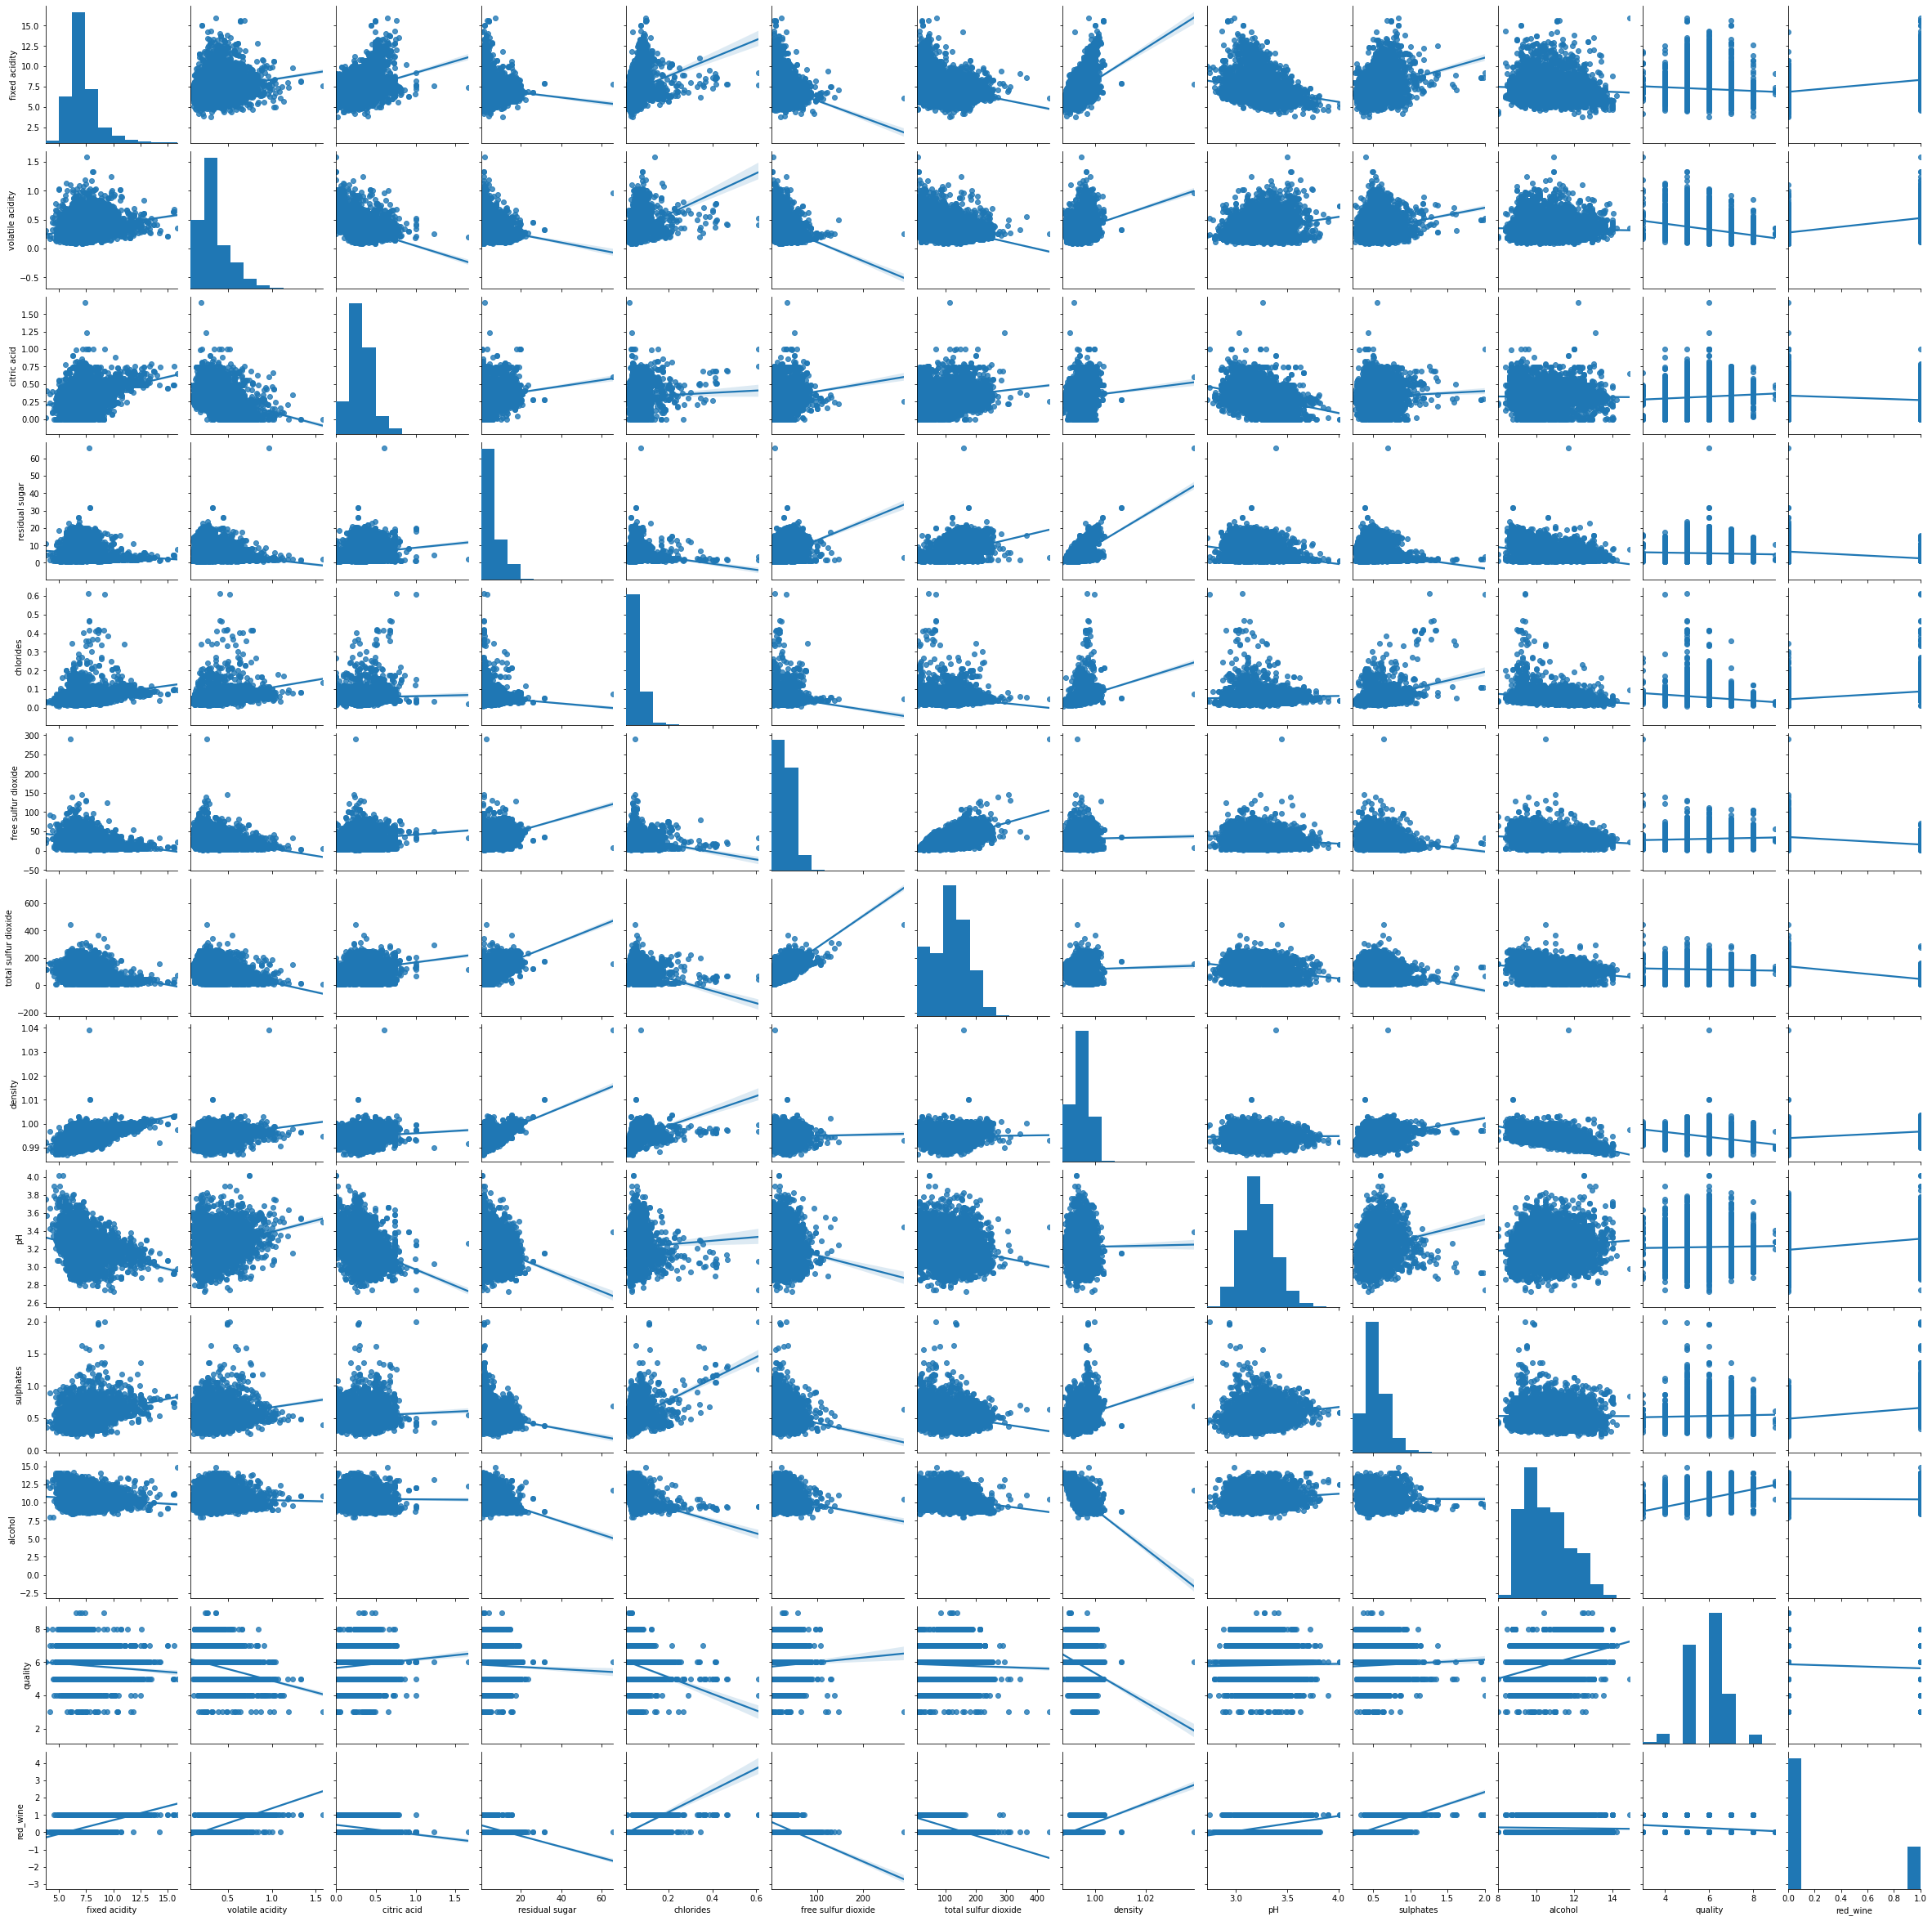

In [9]:
# Generate pairplot
sns.pairplot(wine, kind="reg")
plt.show()

In [10]:
# Compute correlation matrix
wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


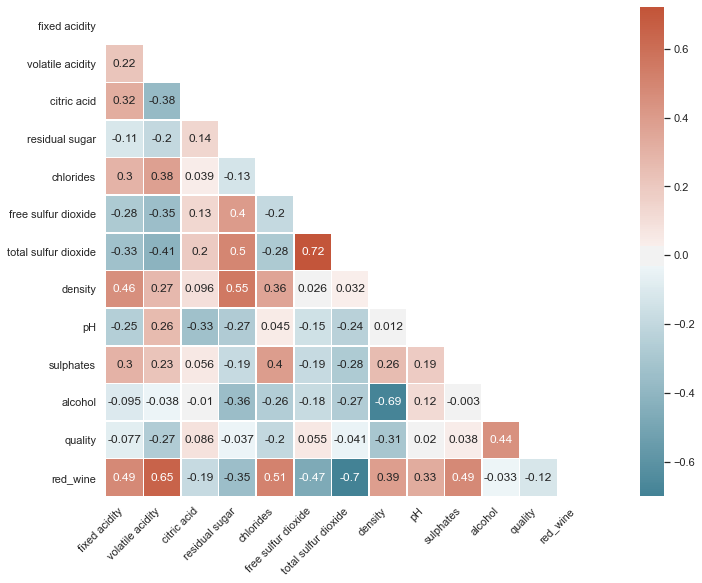

In [11]:
# Generate heatmap for correlation matrix
# Setting heapmap style
sns.set(style="white")

# Generate mask for upper triangle
mask = np.triu(np.ones_like(wine_corr, dtype=bool))

# Configure custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set maximum and minimum values for heatmap
vmax = np.max([x for x in wine_corr.values.flatten() if x!=1])
vmin = wine_corr.min().min()

# Set font and size of heat map
plt.rc('font', family='arial')
plt.figure(figsize=(16,9))

# Generate and store heatmap in variable
heatmap = sns.heatmap(wine_corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0, square=True, 
                      annot=True, linewidths=.5,)

# Angle labels for easier reading
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# display heatmap
plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [12]:
# Target Variable
y = wine.quality

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [13]:
# Check target variable correlations
wine_corr['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
red_wine               -0.119323
Name: quality, dtype: float64

In [14]:
# Rank strength of correlations starting from highest to lowest
wine_corr['quality'].abs().rank(ascending=False).sort_values()

quality                  1.0
alcohol                  2.0
density                  3.0
volatile acidity         4.0
chlorides                5.0
red_wine                 6.0
citric acid              7.0
fixed acidity            8.0
free sulfur dioxide      9.0
total sulfur dioxide    10.0
sulphates               11.0
residual sugar          12.0
pH                      13.0
Name: quality, dtype: float64

In [15]:
# select top 4 highest ranked variables for correlation
init_pred_matrix = ['alcohol','density','volatile acidity','chlorides']

In [16]:
# Compute correlation matrix for initially selected target variables - high correlation noted % alcohol & density
wine[init_pred_matrix].corr()

,alcohol,density,volatile acidity,chlorides
alcohol,1.000000,-0.686745,-0.037640,-0.256916
density,-0.686745,1.000000,0.271296,0.362615
volatile acidity,-0.037640,0.271296,1.000000,0.377124
chlorides,-0.256916,0.362615,0.377124,1.000000


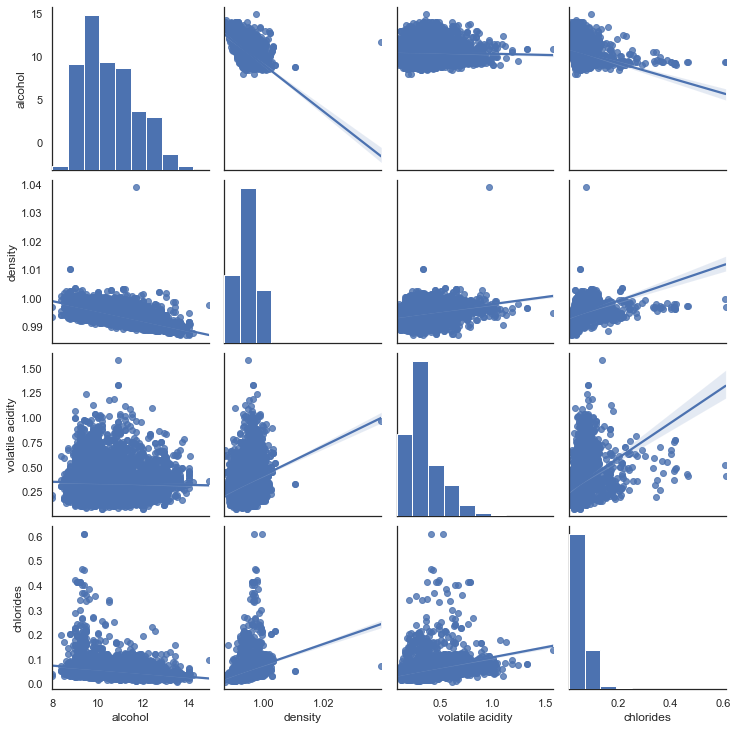

In [17]:
# Generate pairplot
sns.pairplot(wine[init_pred_matrix], kind="reg")
plt.show()

In [18]:
# checking for multicollinearity in indepent variables selected
# https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
# https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

from statsmodels.stats.outliers_influence import variance_inflation_factor

# create independent variable set based on initial selection of predictor variables
X = wine[init_pred_matrix]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                      for i in range(len(X.columns))]
vif_data[vif_data.feature.isin(init_pred_matrix)]

,feature,VIF
0,alcohol,81.344348
1,density,92.346253
2,volatile acidity,6.162387
3,chlorides,4.464308


In [19]:
# eliminate variable with highest VIF (density), due to detected collinearity with alchohol and re-calculate VIF for remaining variables
init_pred_matrix = ['alcohol','volatile acidity','chlorides']

# create independent variable set based on initial selection of predictor variables
X = wine[init_pred_matrix]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                      for i in range(len(X.columns))]
vif_data[vif_data.feature.isin(init_pred_matrix)]

,feature,VIF
0,alcohol,5.349609
1,volatile acidity,6.097711
2,chlorides,3.935457


In [20]:
# ANSWER - I chose features with strong correlation to quality, elimnating single variable with high correlation
pred_matrix = ['alcohol','volatile acidity','chlorides']

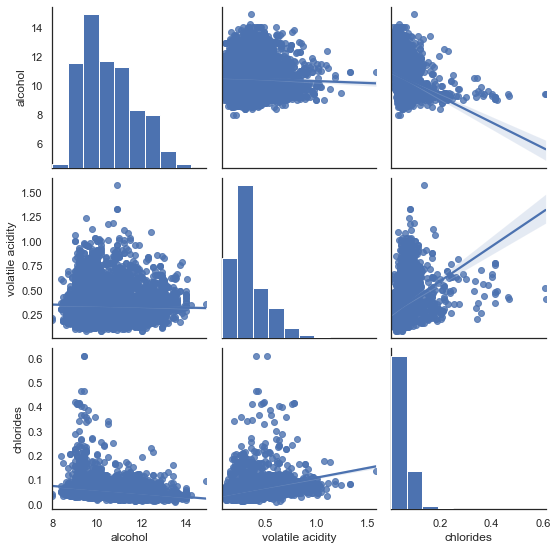

In [21]:
sns.pairplot(wine[pred_matrix],kind="reg")

In [22]:
X = wine[pred_matrix]
X.head()

,alcohol,volatile acidity,chlorides
0,9.4,0.70,0.076
1,9.8,0.88,0.098
2,9.8,0.76,0.092
3,9.8,0.28,0.075
4,9.4,0.70,0.076


### 4. Using Linear Regression Create a Model and Test Score

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
# Create a model for Linear Regression
LR = LinearRegression()
# Fit the model with the Training data
LR.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
print('Training Score is: {}'.format(LR.score(X_train, y_train)))
# Calculate the score (R^2 for Regression) for Testing Data
print('Testing Score is: {}'.format(LR.score(X_test, y_test)))

Training Score is: 0.2617601134276538
Testing Score is: 0.24939464408241752


### BONUS: Cross validation

In [31]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [45]:
# Set up 5-fold cross validation  
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    LR.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = LR.predict(X_train)
    test_preds = LR.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(LR.score(X_train, y_train))
    test_scores.append(LR.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.261760,0.249395,0.753151,0.744552
2,0.258321,0.263876,0.751984,0.749094
3,0.256341,0.271085,0.752060,0.748819
4,0.262057,0.249299,0.747798,0.765694
5,0.259458,0.258878,0.751717,0.750389


In [65]:
# checking out metric scores available

from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [33]:
# Describe the metrics
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.259625,0.258179,0.751319,0.751810
std,0.006927,0.027996,0.003442,0.013820
min,0.250077,0.225007,0.748333,0.729315
25%,0.256616,0.237925,0.748990,0.748582
50%,0.259025,0.260971,0.750225,0.756355
75%,0.264653,0.270556,0.752146,0.761248
max,0.267753,0.296434,0.756902,0.763549


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



